In [8]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Introduction

Kernel Regression which is a generalization of the linear regression model. Uses kernel functions to map the input data into a higher dimensional space. This mapping can help uncover complex, non-linear relationships in the data. The kernel regression model is a non-parametric model, meaning that it does not make any assumptions about the underlying data distribution. This makes it a very flexible model that can be used to model a wide range of data distributions.

The main goal of this notebook is to introduce the kernel regression model and show how it can be used to model complex, non-linear relationships in the data.

The objectives of this notebook are as follows:

1. Introduce the kernel regression model and explain how it works.
2. Implement the kernel regression model in Python using the numpy library.
3. Apply the kernel regression model to a synthetic dataset to model a non-linear relationship.

# Mathematical Background

## Kernel Functions

Kernel functions are a key component of the kernel regression model. They are used to measure the similarity between input data points. The kernel function takes two input data points and returns a scalar value that represents the similarity between the two points. The kernel function is typically symmetric and positive definite, meaning that it is symmetric with respect to its inputs and always returns a non-negative value.

There are many different types of kernel functions that can be used in kernel regression such as:

1. Linear kernel: $K(x, x') = x^T x'$

2. Polynomial kernel: $K(x, x') = (x^T x' + c)^d$

3. Gaussian (RBF) kernel: $K(x, x') = \exp(-\frac{||x - x'||^2}{2\sigma^2})$

4. Uniform kernel: $K(x, x') = \frac{1}{2}I(||x - x'|| \leq \sigma)$

5. Epanechnik kernel: $K(x, x') = \frac{3}{4}(1 - ||x - x'||^2)I(||x - x'|| \leq 1)$


## Kernel Regression Model
Kernel regression is a non-parametric regression technique that uses kernel functions to estimate the conditional expectation of a random variable given an input value. The kernel regression model can be written as follows:


$$\hat{y}(x) = \frac{\sum_{i=1}^{n} K(x, x_i) y_i}{\sum_{i=1}^{n} K(x, x_i)}$$

Where:

- $\hat{y}(x)$ is the predicted value of the target variable at input value $x$.

- $K(x, x_i)$ is the kernel function that measures the similarity between input value $x$ and training data point $x_i$.

- $y_i$ is the target variable value for training data point $x_i$.

- $n$ is the number of training data points.


So for each input value $x$, the kernel regression model computes a weighted average of the target variable values of the training data points, where the weights are determined by the kernel function.

# Python Implementation

In [9]:
# Generating random data

n = 1000
X = np.random.uniform(-1, 1, n)
epsilon = np.random.normal(0,1,n)
Y = np.power(X,5) + np.power(X,3) + epsilon
X = X.reshape(-1,1)


In [10]:
class KernelRegression():
    def __init__(self, X,y, kernel='RBF', bandwidth=1, degree=2):
        self.X = X
        self.Y = y
        self.degree = degree
        self.bandwidth = bandwidth
        self.n_samples = X.shape[0]

        if kernel == 'RBF':
            self.kernel = self.RBF
        elif kernel == 'Linear':
            self.kernel = self.Linear
        elif kernel == 'Polynomial':
            self.kernel = self.Polynomial
        elif kernel == 'Epanechnikov':
            self.kernel = self.Epanechnikov
        elif kernel == 'Uniform':
            self.kernel = self.Uniform

    # Kernel Functions
    def RBF(self, x_test, X):
        return np.exp(-np.linalg.norm(x_test - X, axis=1)**2 / (2 * self.bandwidth**2))
    
    def Linear(self, x_test, X):
        return x_test @ X.T
    
    def Polynomial(self, x_test, X):
        return (1 + x_test @ X.T)**self.degree
    
    def Epanechnikov(self, x_test, X):
        return np.where(np.abs(x_test - X) <= 1, 0.75 * (1 - (x_test - X)**2 / self.bandwidth**2), 0)
    
    def Uniform(self, x_test, X):
        return np.where(np.abs(x_test - X) <= self.bandwidth, 0.5, 0)
    
    # Creating Kernel Weights
    def CreateWeights(self,x_test):
        weights = self.kernel(x_test, self.X)
        return np.sum(self.Y*weights)/np.sum(weights)
    
    # Predictions (Predicting the Y values for the test data)
    def predict(self, x_test):
       return [self.CreateWeights(x) for x in x_test]

In [40]:
# Creating Kernel Regression Models
rbf = KernelRegression(X,Y, kernel='RBF', bandwidth=0.07)
# linear = KernelRegression(X,Y, kernel='Linear')
poly = KernelRegression(X,Y, kernel='Polynomial', degree=10)
# epanechnikov = KernelRegression(X,Y, kernel='Epanechnikov')
# uniform = KernelRegression(X,Y, kernel='Uniform', bandwidth=0.05)

In [41]:
# Predictions
x_test = X # Testing on the same data
y_rbf = rbf.predict(x_test)
# y_linear = linear.predict(x_test)
y_poly = poly.predict(x_test)
# y_epanechnikov = epanechnikov.predict(x_test)
# y_uniform = uniform.predict(x_test)

## Visualization

In [42]:
def PlotPredictions(X,Y,y_hat, title):
    sns.scatterplot(x=X.flatten(),y=Y, label='Actual')
    sns.lineplot(x=X.flatten(),y=y_hat,color='red',linewidth=3, label='predicted')
    plt.legend()
    plt.title(title)
    plt.show()

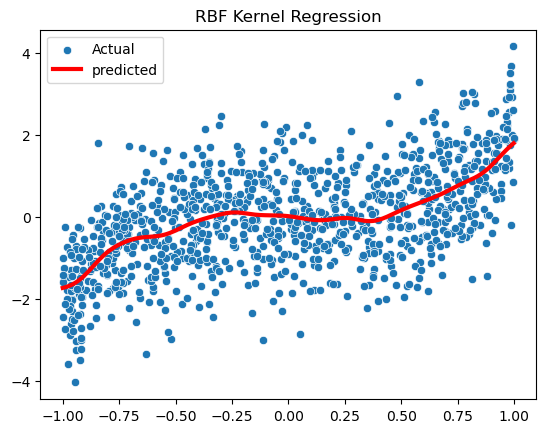

In [43]:
PlotPredictions(X,Y,y_rbf, 'RBF Kernel Regression')

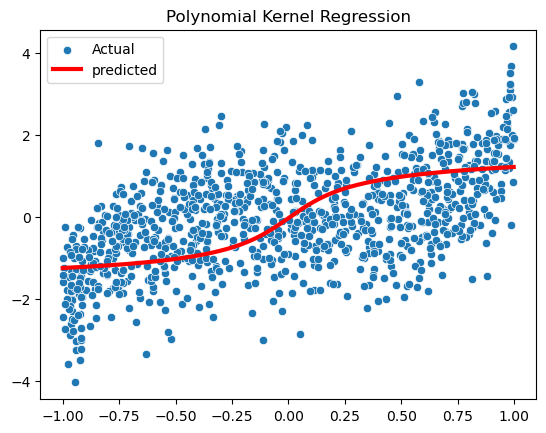

In [44]:
PlotPredictions(X,Y,y_poly, 'Polynomial Kernel Regression')